The dataset used in this task is Credit.
- y = income
- x = all other variables

## **Task 1 (30%)**



**1. Import libraries.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


**2. Read the dataset.**

In [ ]:
dataset = pd.read_csv("credit.csv")
dataset

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0


***Converting non-numerical values to float***

In [ ]:
# Replace the string values with numerical equivalents
dataset = dataset.replace({'No': 0, 'Yes': 1})

# Convert the columns to a float
dataset['Own'] = dataset['Own'].astype(float)
dataset['Student'] = dataset['Student'].astype(float)
dataset['Married'] = dataset['Married'].astype(float)

# One-hot encoding
dataset = pd.get_dummies(data=dataset,columns=['Region'])
dataset

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance,Region_East,Region_South,Region_West
0,14.891,3606,283,2,34,11,0.0,0.0,1.0,333,0,1,0
1,106.025,6645,483,3,82,15,1.0,1.0,1.0,903,0,0,1
2,104.593,7075,514,4,71,11,0.0,0.0,0.0,580,0,0,1
3,148.924,9504,681,3,36,11,1.0,0.0,0.0,964,0,0,1
4,55.882,4897,357,2,68,16,0.0,0.0,1.0,331,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,0.0,0.0,1.0,560,0,1,0
396,13.364,3838,296,5,65,17,0.0,0.0,0.0,480,1,0,0
397,57.872,4171,321,5,67,12,1.0,0.0,1.0,138,0,1,0
398,37.728,2525,192,1,44,13,0.0,0.0,1.0,0,0,1,0


**3. Set independent and dependent variables.**

In [ ]:
X = dataset.drop(columns=['Income'])
y = dataset['Income']

**4. Produce some numerical and graphical summaries of data (pairplot).**


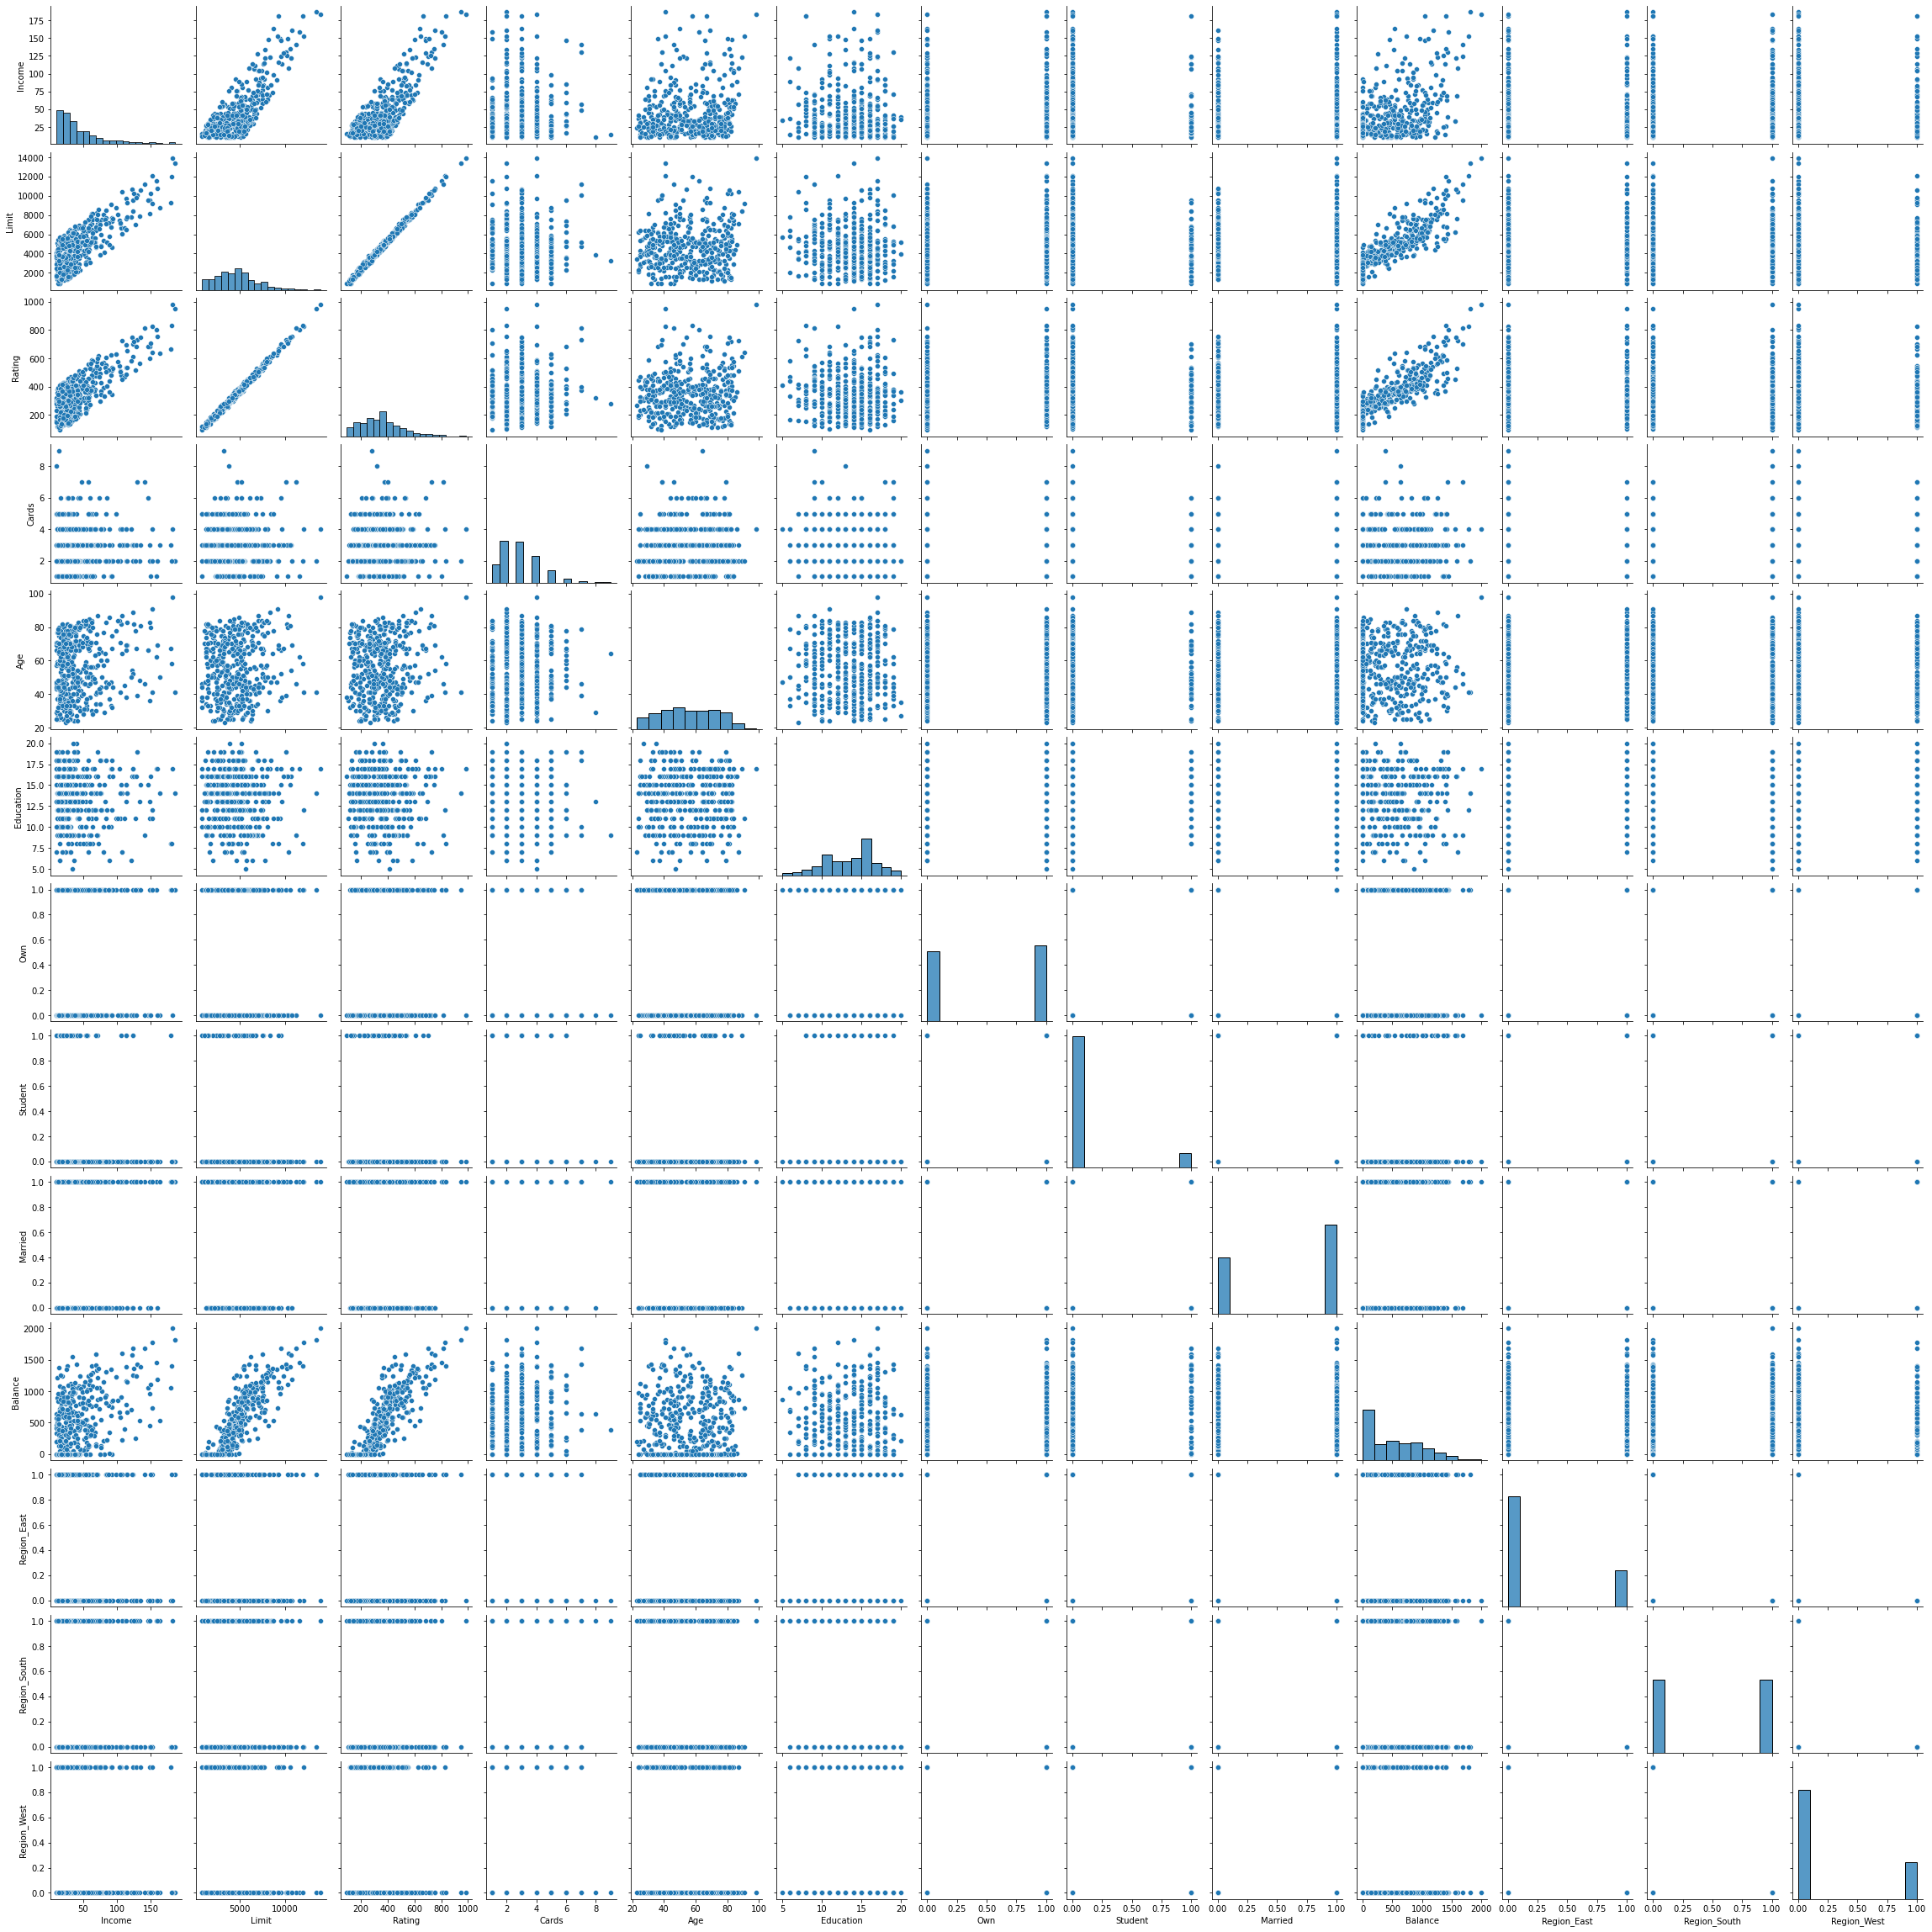

In [ ]:
# Plot the pairlot
sns.pairplot(dataset)
plt.show()

In [ ]:
# Numerical summary of the DataFrame
dataset.describe()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance,Region_East,Region_South,Region_West
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.0000,400.00000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.517500,0.100000,0.61250,520.015000,0.2475,0.49750,0.255000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500319,0.300376,0.48779,459.758877,0.4321,0.50062,0.436407
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.00000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,0.000000,0.00000,68.750000,0.0000,0.00000,0.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,1.000000,0.000000,1.00000,459.500000,0.0000,0.00000,0.000000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000,0.000000,1.00000,863.000000,0.0000,1.00000,1.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1.000000,1.00000,1999.000000,1.0000,1.00000,1.000000



**5. Split the data set into a training set (80%) and a test set (20%).**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
X_train

,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance,Region_East,Region_South,Region_West
353,4716,342,2,47,18,0.0,0.0,0.0,425,0,1,0
203,6784,499,5,40,16,1.0,1.0,0.0,1411,1,0,0
188,7667,554,2,83,11,0.0,0.0,0.0,930,1,0,0
368,5759,440,3,37,6,1.0,0.0,0.0,345,0,1,0
46,5043,376,2,64,16,1.0,1.0,1.0,1241,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
237,5149,388,5,38,15,0.0,0.0,1.0,443,0,0,1
31,2733,210,5,43,16,0.0,0.0,1.0,0,0,0,1
40,3327,253,3,54,14,1.0,0.0,0.0,50,1,0,0
230,5137,387,3,59,9,0.0,0.0,0.0,661,1,0,0


In [ ]:
y_train

353    41.868
203    68.206
188    83.869
368    89.000
46     19.531
        ...  
237    60.579
31     28.941
40     34.950
230    33.214
83     19.225
Name: Income, Length: 320, dtype: float64

**6. Initialize and fit a Multiple Linear Regression model on the training set.**

In [ ]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()


**7. Report your intercept and coefficients.**

In [ ]:
print("Intercept:")
print(mlr.intercept_)

print("Coefficients:")
print(mlr.coef_)

Intercept:
-49.08627815869597
Coefficients:
[ 2.05147962e-02  1.13404666e-01  1.42825618e+00  5.40745663e-03
 -1.11621109e-01 -1.60936916e+00  4.04691530e+01 -5.09177691e-01
 -9.34693312e-02 -7.57424598e-01  3.23583709e-01  4.33840889e-01]


**8. Predict on the test set.**

In [ ]:
y_pred_mlr = mlr.predict(X_test)

**9. Report your prediction results.**

In [ ]:
print("Predicted values: \n", y_pred_mlr)

Predicted values: 
 [ 25.69667895  22.32138512  17.10835667  33.7394448   36.95651507
  74.69410923 155.53586596 161.71632646 116.73669138  32.64949083
  24.14854628  61.03997678  33.14951625  30.51886916  37.57313498
  57.0823425   37.85671348  35.09979168  52.89646818  23.37356824
  10.30552482  34.54451388  24.32738885  28.93232758  18.73631198
 100.44388601  90.48836796  23.90226905  79.6838855   32.99483995
  42.26785718  40.36193764  19.67042915  54.75638123  53.20590927
  41.33234562  94.52379778  27.44648324  43.57624361  49.17504357
  30.38777732 108.69145693  60.25699625  42.98645707  22.62178477
  20.31793224  32.28982576  -8.37704369  30.34967216  35.41926422
  29.26979268 105.43665441  21.63791611 101.73943892  55.09460764
  35.62567612  48.29466644  35.8989196   26.36419498  -0.16778887
  50.05883418  51.01486416  38.59246228  28.91104119  31.99984566
  30.12738584  30.99055325  21.74314246  51.09373402   1.3331853
  22.10837203  36.82444479  27.46156041  78.38224805  65.

In [ ]:
print("Actual values: \n", y_test)

Actual values: 
 133    21.455
331    12.581
167    29.403
335    24.314
239    27.952
        ...  
155    19.537
74     16.103
270    15.866
216    15.476
115    40.442
Name: Income, Length: 80, dtype: float64



**10. Evaluate your results using R2, MAE, MSR and RMSE metrics.**

In [ ]:
mlr_r2 = metrics.r2_score(y_test, y_pred_mlr)
mlr_mae = metrics.mean_absolute_error(y_test, y_pred_mlr)
mlr_msr = metrics.mean_squared_error(y_test, y_pred_mlr)
mlr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print("Multiple Linear Regression")
print('R2 =', mlr_r2)
print('MAE =', mlr_mae)
print('MSE =', mlr_msr)
print('RMSE =', mlr_rmse)

Multiple Linear Regression
R2 = 0.9080682569076466
MAE = 8.59291467646293
MSE = 106.16020599484209
RMSE = 10.303407494360401


**11. Report and describe your metrics results:**

 In this case we have R2 value of 0.9. It means that the percentage of the variance in the dependent variables that the independent variables explain collectively is 90%. According to «Investopedia», in finance, an R-squared values above 0.7 generally show high level of correlation, because usually the larger the R2, the smaller differences between the observed data and fitted values.
 MAE is mean absolute error, which equals 8.59. Simply MAE is the average error that the model’s predictions have in comparison with their corresponding actual targets. Our MAE value means, that the average error between the predictions and actuals in this dataset is 8.59
MSE is a measure of the difference between two values/sets of values that are being compared. In this case, the MSE of 106 indicates that the difference between the two values being compared is 106.
RMSE of 10.30 corresponds to the accuracy the model predicts the response. It’s an absolute measure fit, lower values of RMSE indicate better fit. For our dataset, it pretty small, because the values range from 10 to 186.

## **Task 2 (30%)**

**Tasks to do:**

**1. Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import KFold
from sklearn import metrics

**2. Read the dataset.**

In [ ]:
dataset = pd.read_csv("credit.csv")
dataset

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0


In [ ]:
dataset.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


***Converting non-numerical values to float***

In [ ]:
# Replace the string values with numerical equivalents
dataset = dataset.replace({'No': 0, 'Yes': 1})

# Convert the columns to a float
dataset['Own'] = dataset['Own'].astype(int)
dataset['Student'] = dataset['Student'].astype(int)
dataset['Married'] = dataset['Married'].astype(int)

# One-hot encoding
dataset = pd.get_dummies(data=dataset,columns=['Region'])
dataset

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance,Region_East,Region_South,Region_West
0,14.891,3606,283,2,34,11,0,0,1,333,0,1,0
1,106.025,6645,483,3,82,15,1,1,1,903,0,0,1
2,104.593,7075,514,4,71,11,0,0,0,580,0,0,1
3,148.924,9504,681,3,36,11,1,0,0,964,0,0,1
4,55.882,4897,357,2,68,16,0,0,1,331,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,0,0,1,560,0,1,0
396,13.364,3838,296,5,65,17,0,0,0,480,1,0,0
397,57.872,4171,321,5,67,12,1,0,1,138,0,1,0
398,37.728,2525,192,1,44,13,0,0,1,0,0,1,0


**3. Set independent and dependent variables.**

In [ ]:
X = dataset.drop(columns=['Income'])
y = dataset['Income']

**4. Produce some numerical and graphical summaries of data (pairplot).**


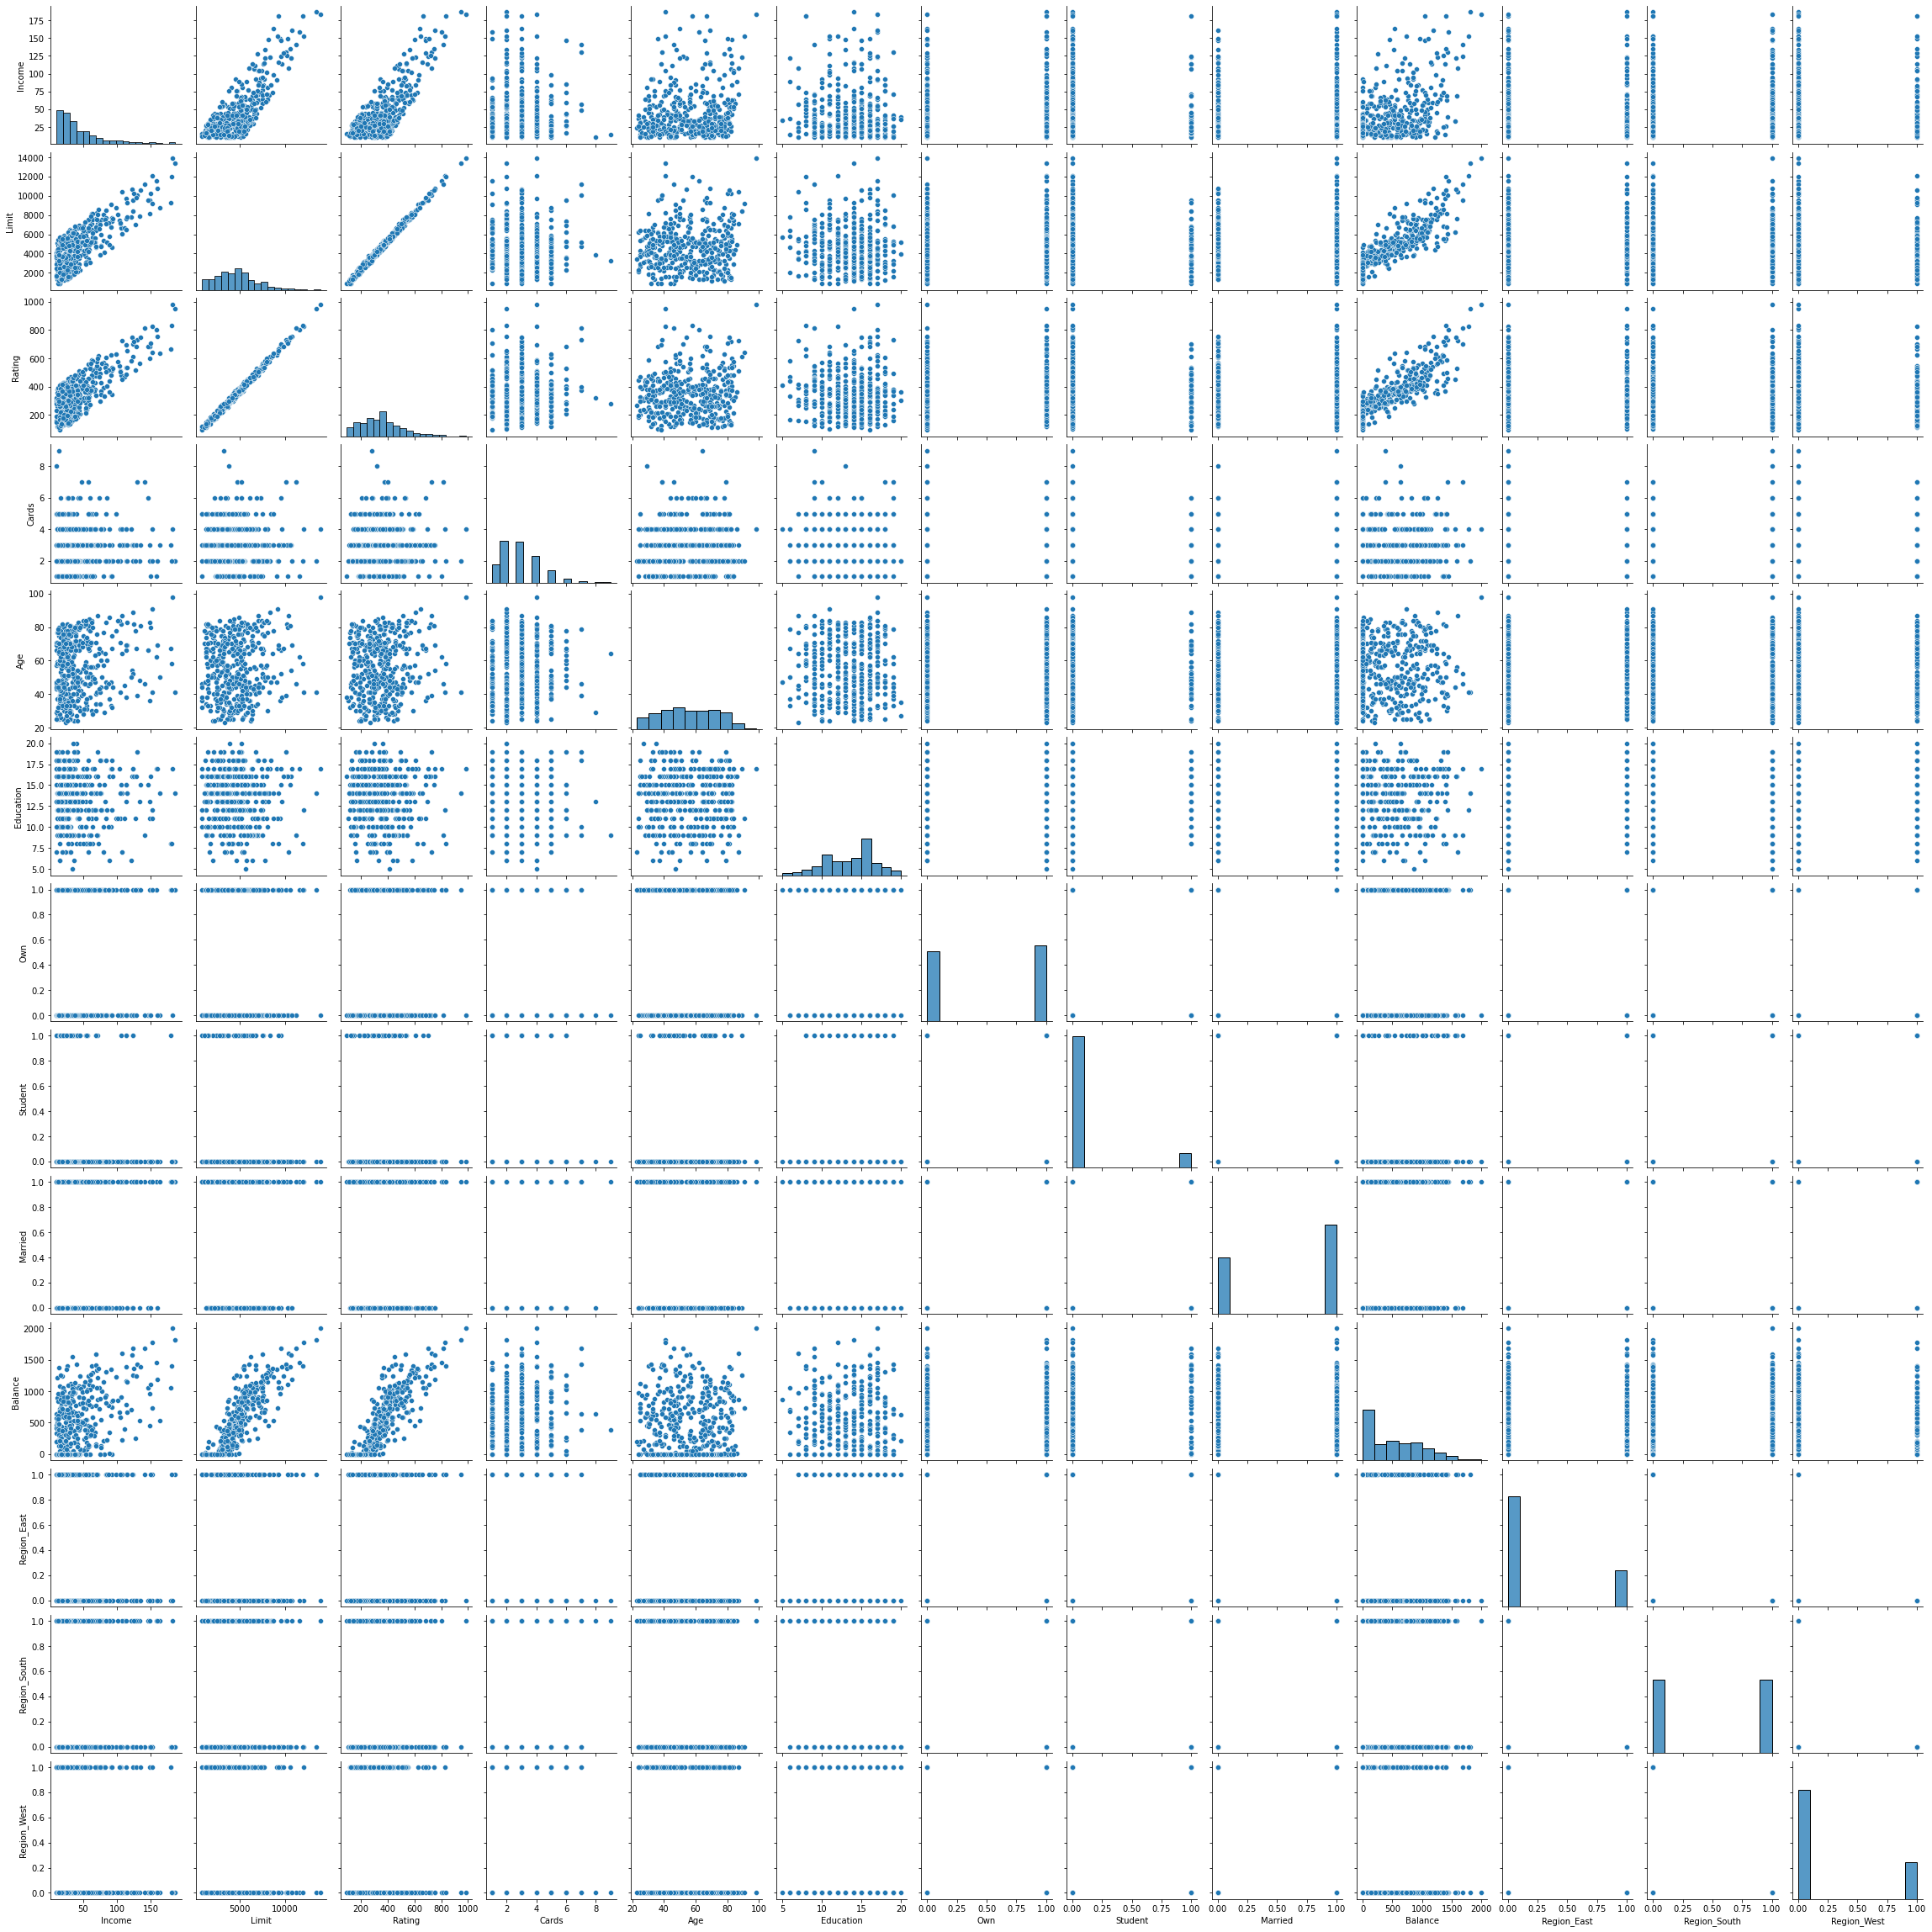

In [ ]:
# Plot the pairlot
sns.pairplot(dataset)
plt.show()

In [ ]:
dataset.describe()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance,Region_East,Region_South,Region_West
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.0000,400.00000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.517500,0.100000,0.61250,520.015000,0.2475,0.49750,0.255000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500319,0.300376,0.48779,459.758877,0.4321,0.50062,0.436407
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.00000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,0.000000,0.00000,68.750000,0.0000,0.00000,0.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,1.000000,0.000000,1.00000,459.500000,0.0000,0.00000,0.000000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000,0.000000,1.00000,863.000000,0.0000,1.00000,1.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1.000000,1.00000,1999.000000,1.0000,1.00000,1.000000



**5. Split the data set into a training set (80%) and a test set (20%).**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
X_train

,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance,Region_East,Region_South,Region_West
353,4716,342,2,47,18,0,0,0,425,0,1,0
203,6784,499,5,40,16,1,1,0,1411,1,0,0
188,7667,554,2,83,11,0,0,0,930,1,0,0
368,5759,440,3,37,6,1,0,0,345,0,1,0
46,5043,376,2,64,16,1,1,1,1241,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
237,5149,388,5,38,15,0,0,1,443,0,0,1
31,2733,210,5,43,16,0,0,1,0,0,0,1
40,3327,253,3,54,14,1,0,0,50,1,0,0
230,5137,387,3,59,9,0,0,0,661,1,0,0


In [ ]:
y_train

353    41.868
203    68.206
188    83.869
368    89.000
46     19.531
        ...  
237    60.579
31     28.941
40     34.950
230    33.214
83     19.225
Name: Income, Length: 320, dtype: float64

**6. Initialize and fit a Ridge Regression model on the training set, with λ chosen by 5-fold cross-validation.**

In [ ]:
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

**7. Report your intercept and coefficients.**

In [ ]:
print("Intercept:")
print(ridge.intercept_)

print("Coefficients:")
print(ridge.coef_)

Intercept:
-49.036287737489964
Coefficients:
[ 2.04614126e-02  1.13817802e-01  1.42003796e+00  5.54439968e-03
 -1.10407525e-01 -1.60096764e+00  4.02642924e+01 -5.14983549e-01
 -9.33199370e-02 -7.54689638e-01  3.18996393e-01  4.35693246e-01]


**8. Predict on the test set.**


In [ ]:
y_pred_ridge = ridge.predict(X_test)


**9. Report your prediction results.**

In [ ]:
print("Predicted values: \n", y_pred_ridge)

Predicted values: 
 [ 2.57619644e+01  2.23493184e+01  1.71195087e+01  3.37411961e+01
  3.69664251e+01  7.46556503e+01  1.55450284e+02  1.61494731e+02
  1.16730920e+02  3.27090893e+01  2.40148412e+01  6.10812383e+01
  3.31345991e+01  3.05030868e+01  3.75964744e+01  5.70928357e+01
  3.77124129e+01  3.51170858e+01  5.28851464e+01  2.34357862e+01
  1.03390301e+01  3.45728099e+01  2.43298038e+01  2.89658882e+01
  1.87679293e+01  1.00477375e+02  9.04813625e+01  2.39254052e+01
  7.96899171e+01  3.30017941e+01  4.22657591e+01  4.03854718e+01
  1.97278790e+01  5.47587980e+01  5.32339661e+01  4.13403350e+01
  9.44567320e+01  2.74931923e+01  4.34200510e+01  4.92093183e+01
  3.04107280e+01  1.08621283e+02  6.02806195e+01  4.29803650e+01
  2.26619862e+01  2.03446540e+01  3.22937124e+01 -8.33409853e+00
  3.02606728e+01  3.54173164e+01  2.92957777e+01  1.05400008e+02
  2.16680877e+01  1.01758025e+02  5.51110871e+01  3.56364831e+01
  4.83330370e+01  3.58112244e+01  2.63483096e+01 -1.42815590e-01
  5.0

In [ ]:
print("Actual values: \n", y_test)

Actual values: 
 133    21.455
331    12.581
167    29.403
335    24.314
239    27.952
        ...  
155    19.537
74     16.103
270    15.866
216    15.476
115    40.442
Name: Income, Length: 80, dtype: float64


**10. Evaluate your results using R2, MAE, MSR and RMSE metrics.**

In [ ]:
ridge_r2 = metrics.r2_score(y_test, y_pred_ridge)
ridge_mae = metrics.mean_absolute_error(y_test, y_pred_ridge)
ridge_msr = metrics.mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))

print("Ridge Regression")
print('R2 =', ridge_r2)
print('MAE =', ridge_mae)
print('MSE =', ridge_msr)
print('RMSE =', ridge_rmse)

Ridge Regression
R2 = 0.9079823229326652
MAE = 8.59674701109638
MSE = 106.25944014595366
RMSE = 10.308221968213221


**11. Report and describe your metrics results.**

As in the previous taks, the coefficient of determination with the value of 0.90 is a higly good result. Because it indicates that our model fits almost all data well enough, due to the fact that the variance can be explained.
Using reidge regression, we obtained the mean abosulete error of 8.59. It can be explained by pecularity of ridge regression model, as by adding a degree of bias to the regression estimates, we are able to reduces the standard errors.
Looking at MSE and RMSE rescpetively, these metrics estimators remained the same, like in the first case. Because the ridge regression algorithm of best fit line doesn't really influence outliers, that eventually lead to the mean squared error and root mean square deviation accordingly

## **Task 3 (30%)**

**1. Import libraries.**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import metrics

**2. Read the dataset.**

In [ ]:
dataset = pd.read_csv("credit.csv")
dataset

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0


***Converting non-numerical values to float***

In [ ]:
# Replace the string values with numerical equivalents
dataset = dataset.replace({'No': 0, 'Yes': 1})

# Convert the columns to a float
dataset['Own'] = dataset['Own'].astype(float)
dataset['Student'] = dataset['Student'].astype(float)
dataset['Married'] = dataset['Married'].astype(float)

# One-hot encoding
dataset = pd.get_dummies(data=dataset,columns=['Region'])
dataset

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance,Region_East,Region_South,Region_West
0,14.891,3606,283,2,34,11,0.0,0.0,1.0,333,0,1,0
1,106.025,6645,483,3,82,15,1.0,1.0,1.0,903,0,0,1
2,104.593,7075,514,4,71,11,0.0,0.0,0.0,580,0,0,1
3,148.924,9504,681,3,36,11,1.0,0.0,0.0,964,0,0,1
4,55.882,4897,357,2,68,16,0.0,0.0,1.0,331,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,0.0,0.0,1.0,560,0,1,0
396,13.364,3838,296,5,65,17,0.0,0.0,0.0,480,1,0,0
397,57.872,4171,321,5,67,12,1.0,0.0,1.0,138,0,1,0
398,37.728,2525,192,1,44,13,0.0,0.0,1.0,0,0,1,0


**3. Set independent and dependent variables.**



In [ ]:
X = dataset.drop(columns=['Income'])
y = dataset['Income']

**4. Produce some numerical and graphical summaries of data (pairplot).**

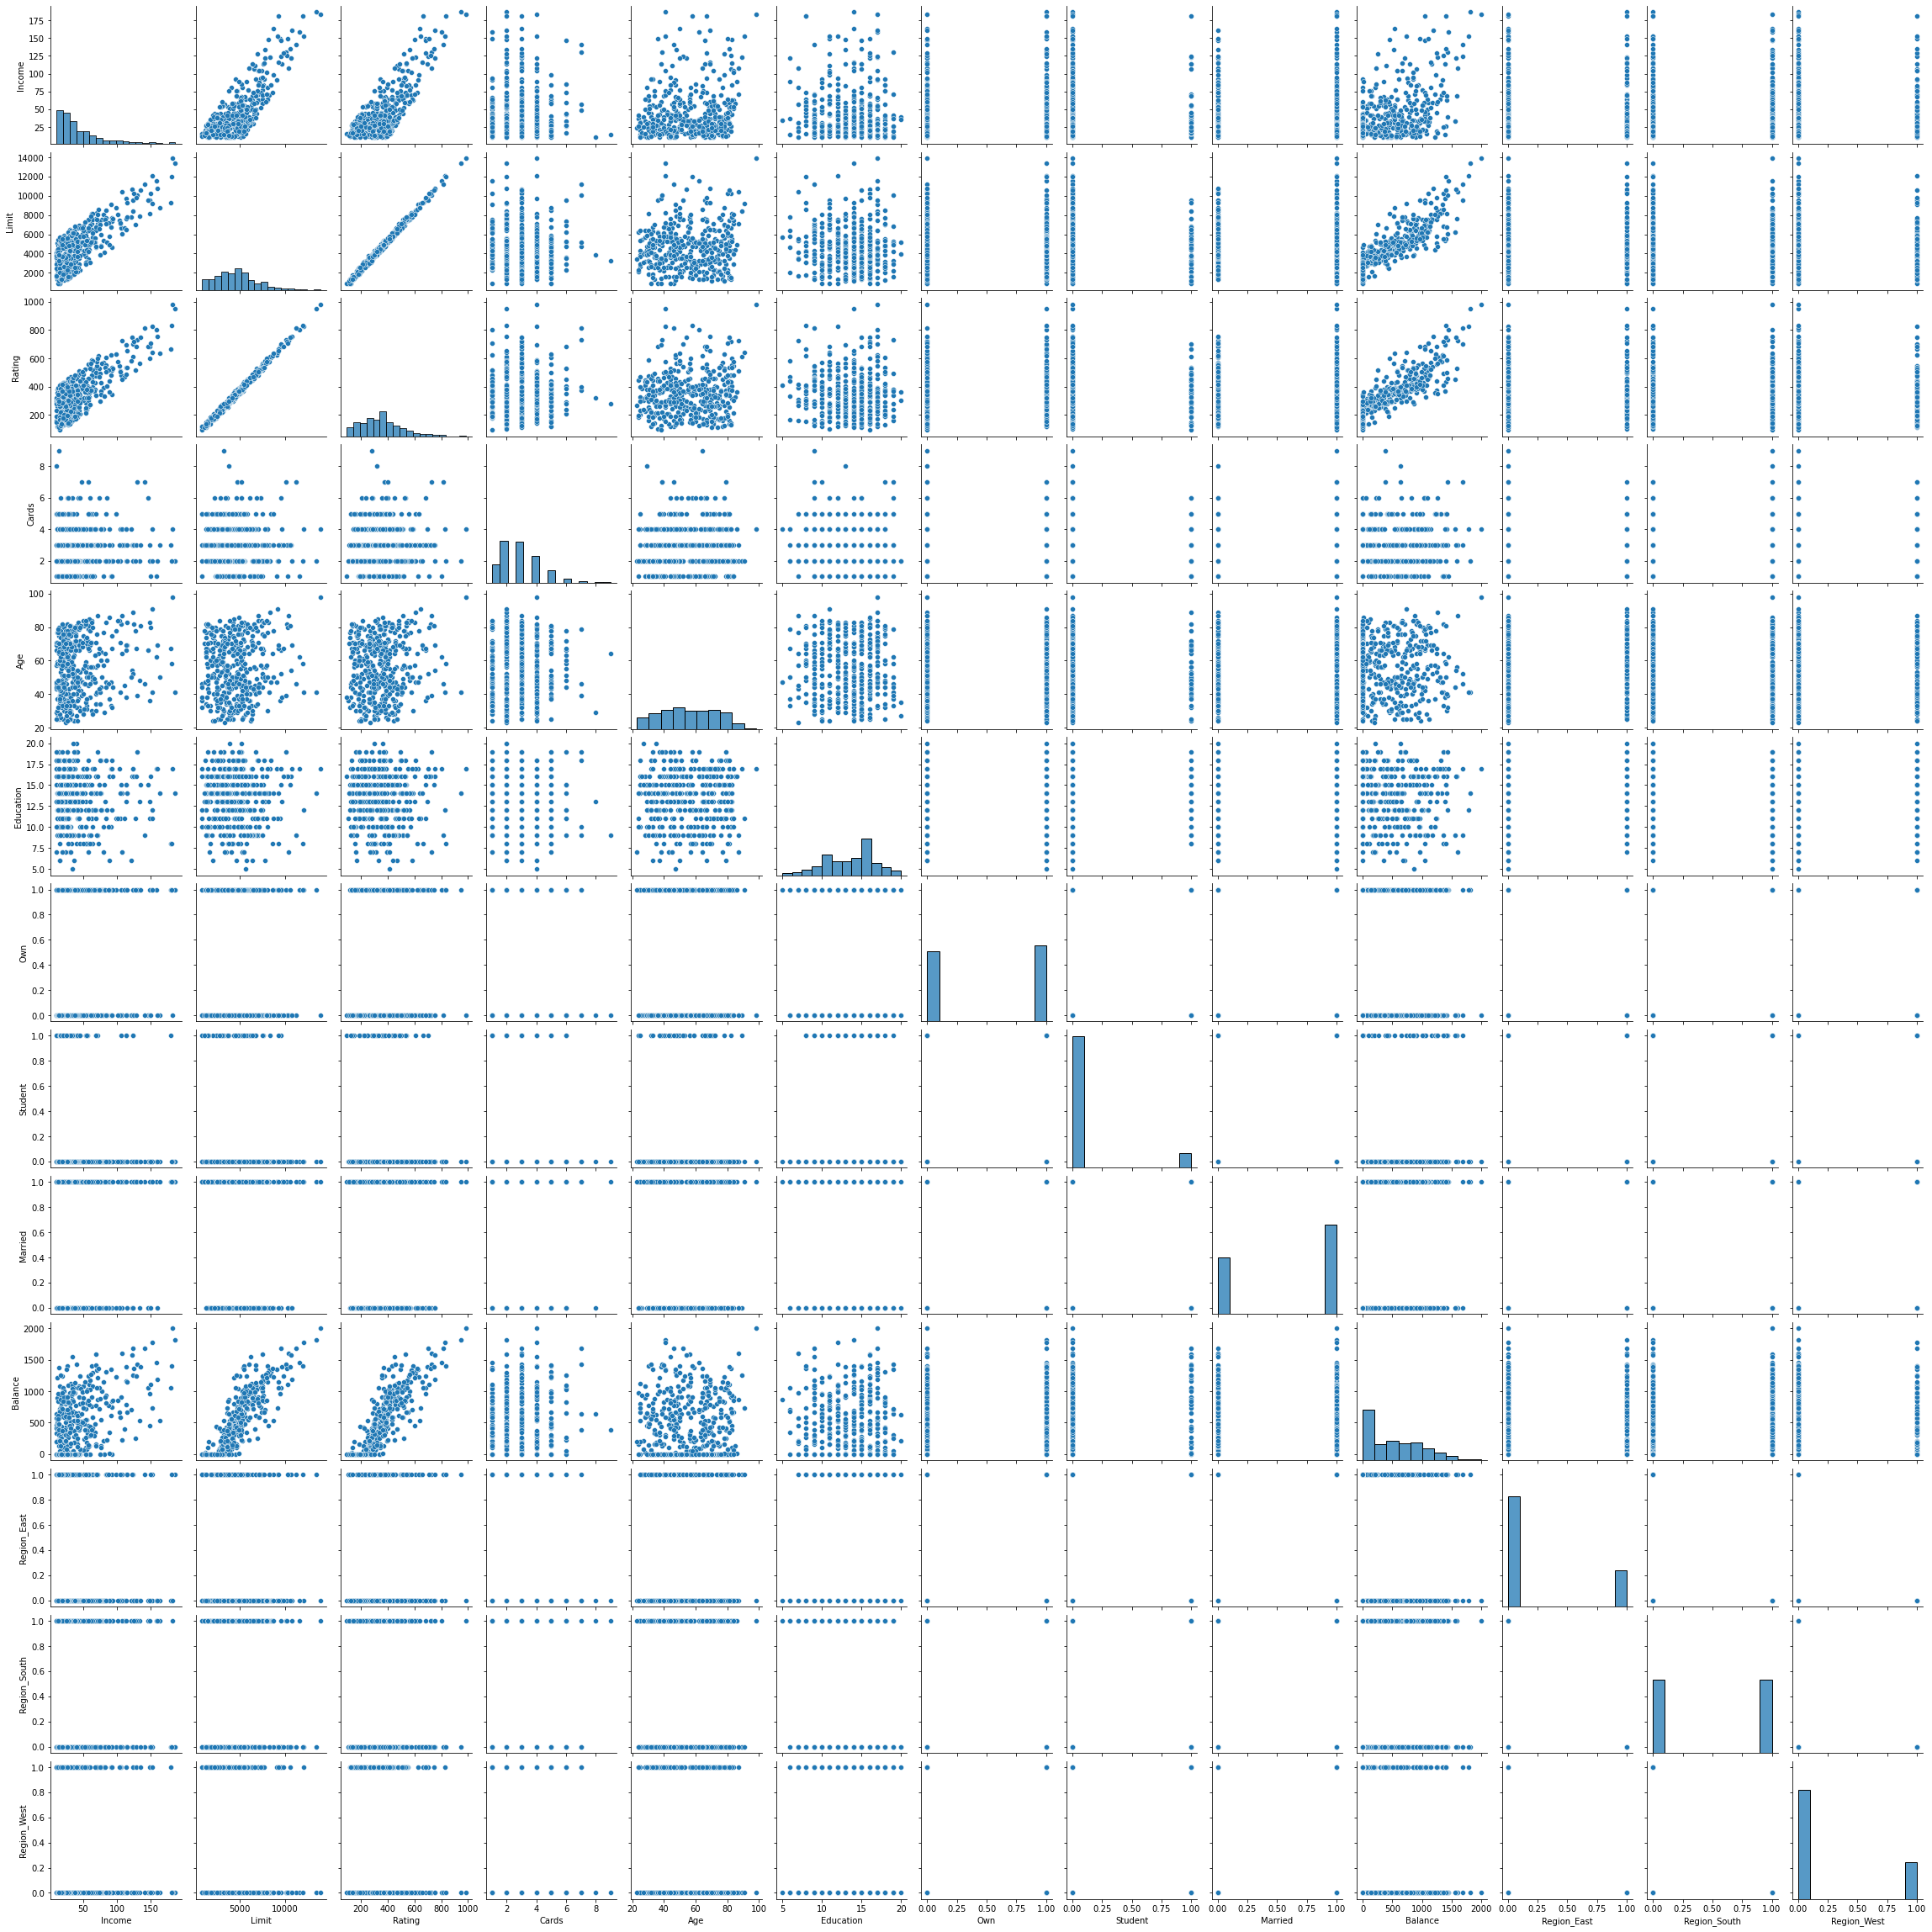

In [ ]:
# Plot the pairlot
sns.pairplot(dataset)
plt.show()

In [ ]:
dataset.describe()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance,Region_East,Region_South,Region_West
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.0000,400.00000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.517500,0.100000,0.61250,520.015000,0.2475,0.49750,0.255000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500319,0.300376,0.48779,459.758877,0.4321,0.50062,0.436407
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.00000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,0.000000,0.00000,68.750000,0.0000,0.00000,0.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,1.000000,0.000000,1.00000,459.500000,0.0000,0.00000,0.000000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000,0.000000,1.00000,863.000000,0.0000,1.00000,1.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1.000000,1.00000,1999.000000,1.0000,1.00000,1.000000


**5. Split the data set into a training set (80%) and a test set (20%).**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
X_train

,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance,Region_East,Region_South,Region_West
353,4716,342,2,47,18,0.0,0.0,0.0,425,0,1,0
203,6784,499,5,40,16,1.0,1.0,0.0,1411,1,0,0
188,7667,554,2,83,11,0.0,0.0,0.0,930,1,0,0
368,5759,440,3,37,6,1.0,0.0,0.0,345,0,1,0
46,5043,376,2,64,16,1.0,1.0,1.0,1241,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
237,5149,388,5,38,15,0.0,0.0,1.0,443,0,0,1
31,2733,210,5,43,16,0.0,0.0,1.0,0,0,0,1
40,3327,253,3,54,14,1.0,0.0,0.0,50,1,0,0
230,5137,387,3,59,9,0.0,0.0,0.0,661,1,0,0


In [ ]:
y_train

353    41.868
203    68.206
188    83.869
368    89.000
46     19.531
        ...  
237    60.579
31     28.941
40     34.950
230    33.214
83     19.225
Name: Income, Length: 320, dtype: float64

**6. Initialize and fit a Lasso Regression model on the training set, with λ chosen by 5-fold cross-validation.**

In [ ]:
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)

LassoCV(cv=5)

**7. Report your intercept and coefficients.**


In [ ]:
print("Intercept:")
print(lasso.intercept_)

print("Coefficients:")
print(lasso.coef_)

Intercept:
-29.104733194444016
Coefficients:
[ 0.02257699  0.          0.          0.          0.         -0.
  0.         -0.         -0.0614961  -0.         -0.          0.        ]


**8. Predict on the test set.**

In [ ]:
y_pred_lasso = lasso.predict(X_test)

**9. Report your prediction results.**

In [ ]:
print("Predicted values: \n", y_pred_lasso)

Predicted values: 
 [ 39.89353325  31.51224293  23.43193223  35.929996    41.17777032
  68.91459335 135.50614154 116.51617466 116.25200184  42.39828113
  -0.67972665  70.86771408  29.7534906   28.06021603  40.04654229
  57.76344339  10.01231848  42.17311367  49.34602647  36.89519741
  12.70786     36.09473141  28.21825499  32.52813722  26.26853653
 107.12549822  91.85928873  30.63088746  81.62606661  30.40211366
  40.31952387  47.69337641  33.96937226  56.36800368  57.32547618
  41.23328176  81.77410038  36.91706261  12.51841949  56.41385367
  36.0518537   93.1426573   67.31914432  41.8542979   33.71382843
  29.02312538  34.56239035   0.24535922  15.77320652  37.43498035
  36.79854524  94.95976097  29.2779732  104.62582765  56.12136213
  39.22794253  60.23377006  17.60938288  21.32083448   1.35163194
  56.04062937  58.1860147   44.5406784   42.57554096  36.52021306
  43.12992903  -3.22290048  19.84219016  53.3925655    4.78333505
  22.32565952  52.13932307  28.2419349   80.46892126  58

In [ ]:
print("Actual values: \n", y_test)

Actual values: 
 133    21.455
331    12.581
167    29.403
335    24.314
239    27.952
        ...  
155    19.537
74     16.103
270    15.866
216    15.476
115    40.442
Name: Income, Length: 80, dtype: float64


**10. Evaluate your results using R2, MAE, MSR and RMSE metrics.**

In [ ]:
lasso_r2 = metrics.r2_score(y_test, y_pred_lasso)
lasso_mae = metrics.mean_absolute_error(y_test, y_pred_lasso)
lasso_msr = metrics.mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

print("Lasso Regression")
print('R2 =', lasso_r2)
print('MAE =', lasso_mae)
print('MSE =', lasso_msr)
print('RMSE =', lasso_rmse)

Lasso Regression
R2 = 0.7757033970818316
MAE = 13.767580854495838
MSE = 259.01144445630143
RMSE = 16.093832497460056


**11. Report and describe your metrics results.**

R2 equals 0.77 is not that perfect in comparison with previous 2 results, but 77% of the variability in the dependent variable is still explained by the independent variable. We can assume that for this kind of data science problem, it would be better to use multiple or ridge linear regression, rather than lasso regression.
Mean of abosolute error became much higher. Thus, with lasso regression our model makes less accurate predicted values, because of the higher occurance of errors.
Mean squared error is pretty unwanted valuer of 259. It means that the average squared error between actual and predicted values is much higher. But as the error is not returned on the same scale as the target, it is difficult to interpret its meaning. We may assume that it's better to not to use lasso regession for this case. One of the possible reasons of such outcomes is  limitation, that if there are 2 or more highly collinear vatiables, then Lasso Regression will select one of them randomly, which is obviously noy a good technique

## **Task 4 (30%)**

1. We used the same data,test and train sets for each of linear regression models, so it's deffinetely correct to compare the results of predictions from each model between each other.
2. We started from modifiying our dataframe, as intially it had 4 columns with categorical type of data, therefore we used one-hot encoding techniques such as get_dummies to transform it into numerical form, which is better understood by computer.
3. Then, we set depentednt(Income) and inpendent variables(Limit, Rating, Cards,Age, Education, Own, Student, Married, Balance, Region_East, Region_South,
Region_West) and divied our dataset into train and test sets with a ration of 80/20.
4. After sets preparation process was completed, we implemented 3 different modification of linear regression models: 1)multiple linear, 2)ridge and 3)lasso. 5-fold cross validation was used for 2nd and 3rd.
5. As we see from the graphs results, values of multiple linear and ridge regression overlap each other. It correspons to the fact, that these models haves simmilar results with this dataset
6. We used four different metrics to estimate results of our models:


*   R2 value represents the percentage of the variance in the dependent variables that the independent variables explain collectively and measures the strength of the relationship between our model and the dependent variable
*  MAE defines the average difference between the actual and predicted values. The lower this value, the more accurate predictions our model makes. It is different for different datasets, but in our case it ranges 8 to 13
*  At the same time, MSE is used in order to estimates the average squared difference between the estimated values and actual values and RMSE is the root square value of MSE


7. During comparison of 4 differnet metrics(r squared, mean absolute error, mean squared error, root mean squared error) among multiple linear, ridge and lasso regression models the multiple linear regression the absolute winner, having
*  best coefficient of determination of 0.9. 90% of the variance in the dependent variables that the independent variables explain
*  lowest mean absolute error, so the multiple linear regression model makes less mistakes in it's prediciton
*  lowest MSE and RMSE of 106 and 10 respectively. It shows us that we have lower count of otlier compared to ther results.
8. On "Comparing the coefficients" graph, we see that coefficients used to predict are quite simmilar. The only noticible difference is between lasso and other 2 regressions, as they don't overlap each other exactyle on every point, but have similar patterns.
9. During comparing alpha-values using Cross-Validation, we see that ridge model performs slightly better than lasso. Because the higher score telss us that model genralizes/fits better in the training set.

**Comparing the predicted values**

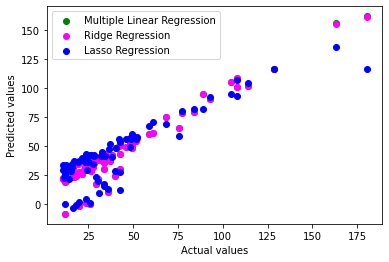

In [ ]:
plt.scatter(y_test, y_pred_mlr, color='green', label="Multiple Linear Regression")
plt.scatter(y_test, y_pred_ridge, color='magenta', label="Ridge Regression")
plt.scatter(y_test, y_pred_lasso, color='blue', label="Lasso Regression")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.legend()
plt.show()

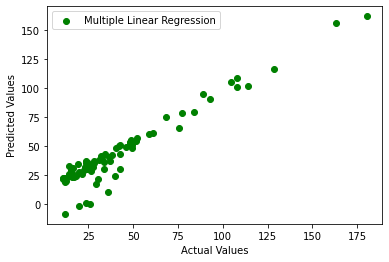

In [ ]:
plt.scatter(y_test, y_pred_mlr, color='green', label="Multiple Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

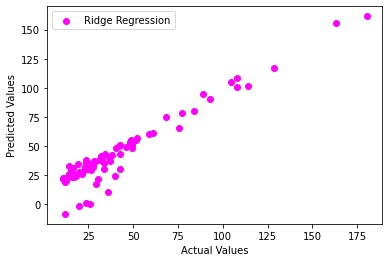

In [ ]:
plt.scatter(y_test, y_pred_ridge, color='magenta', label="Ridge Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

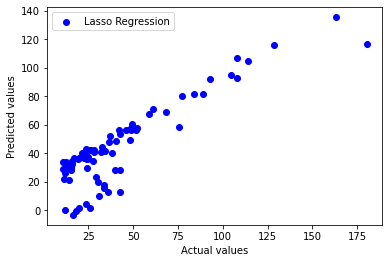

In [ ]:
plt.scatter(y_test, y_pred_lasso, color='blue', label="Lasso Regression")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.legend()
plt.show()

**Comparing the coefficients**

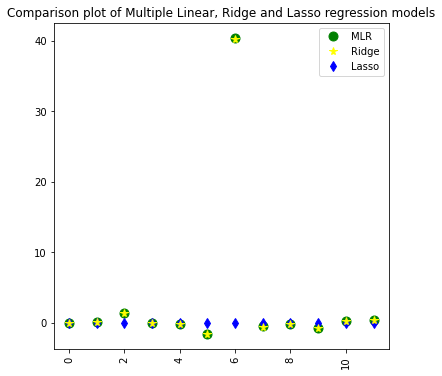

In [ ]:
plt.figure(figsize = (6, 6))

plt.plot(mlr.coef_, linestyle='none', marker='o', markersize=9, color='green', label='MLR')
plt.plot(ridge.coef_, linestyle='none', marker='*', markersize=8, color='yellow', label=r'Ridge', zorder=7)
plt.plot(lasso.coef_, linestyle='none', marker='d', markersize=7, color='blue', label=r'Lasso')

plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Multiple Linear, Ridge and Lasso regression models")
plt.show()


**Comparing the R2, MAE, MSR and RMSE metrics.**

In [ ]:
# Compare R2 metric
if mlr_r2 > ridge_r2 and mlr_r2 > lasso_r2:
    print("Multiple Linear Regression has the highest R^2 value =",mlr_r2)
elif ridge_r2 > mlr_r2 and ridge_r2 > lasso_r2:
    print("Ridge Regression has the highest R^2 value =", ridge_r2)
else:
    print("Lasso Regression has the highest R^2 value =", lasso_r2)

# Compare Mean Absolute Error metric
if mlr_mae < ridge_mae and mlr_mae < lasso_mae:
    print("Multiple Linear Regression has the lowest MAE value =", mlr_mae)
elif ridge_mae < mlr_mae and ridge_mae < lasso_mae:
    print("Ridge Regression has the lowest MAE value =", ridge_mae)
else:
    print("Lasso Regression has the lowest MAE value =" , lasso_mae)

# Compare Mean Squared Error metric
if mlr_msr < ridge_msr and mlr_msr < lasso_msr:
    print("Multiple Linear Regression has the lowest MSE value =",mlr_msr)
elif ridge_msr < mlr_msr and ridge_msr < lasso_msr:
    print("Ridge Regression has the lowest MSE value =",ridge_msr)
else:
    print("Lasso Regression has the lowest MSE value =", lasso_msr)

# Compare Root Mean Squared Error metric
if mlr_rmse < ridge_rmse and mlr_rmse < lasso_rmse:
    print("Multiple Linear Regression has the lowest RMSE value =", mlr_rmse)
elif ridge_rmse < mlr_rmse and ridge_rmse < lasso_rmse:
    print("Ridge Regression has the lowest RMSE value =", ridge_rmse)
else:
    print("Lasso Regression has the lowest RMSE value =",lasso_rmse)

Multiple Linear Regression has the highest R^2 value = 0.9080682569076466
Multiple Linear Regression has the lowest MAE value = 8.59291467646293
Multiple Linear Regression has the lowest MSE value = 106.16020599484209
Multiple Linear Regression has the lowest RMSE value = 10.303407494360401


**Comparing alpha-values using Cross-Validation in sklearn**

In [ ]:
import warnings
warnings.simplefilter("ignore")


print("The train score for Lasso model =", lasso.score(X_train, y_train))
print("The train score for Lasso model =", lasso.score(X_test, y_test))

The train score for Lasso model = 0.8203369969182409
The train score for Lasso model = 0.7757033970818316


In [ ]:
print("The train score for Ridge model = {}".format(ridge.score(X_train, y_train)))
print("The train score for Ridge model = {}".format(ridge.score(X_test, y_test)))

The train score for Ridge model = 0.9057992653896725
The train score for Ridge model = 0.9079823229326652


:)